In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pyaudio
import pprint

In [6]:
import pyaudio
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for i in range(0, num_devices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print( "Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone Array (Realtek High 
Input Device id  2  -  Headset (ThisBeBose Hands-Free 


In [7]:
info = p.get_host_api_info_by_index(0)


In [8]:
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
#     pprint.pprint(device)
    if device.get('maxOutputChannels') > 0:
        print(device.get('name'),device.get('index'))
        print("OUTPUT!")
print(device.keys())

Microsoft Sound Mapper - Output 3
OUTPUT!
Headphones (ThisBeBose Stereo) 4
OUTPUT!
Headset (ThisBeBose Hands-Free  5
OUTPUT!
Speakers (Realtek High Definiti 6
OUTPUT!
Speakers (Cypress Digital Audio 7
OUTPUT!
dict_keys(['index', 'structVersion', 'name', 'hostApi', 'maxInputChannels', 'maxOutputChannels', 'defaultLowInputLatency', 'defaultLowOutputLatency', 'defaultHighInputLatency', 'defaultHighOutputLatency', 'defaultSampleRate'])


In [9]:
p.get_default_output_device_info()

{'index': 4,
 'structVersion': 2,
 'name': 'Headphones (ThisBeBose Stereo)',
 'hostApi': 0,
 'maxInputChannels': 0,
 'maxOutputChannels': 2,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [10]:
info

{'index': 0,
 'structVersion': 1,
 'type': 2,
 'name': 'MME',
 'deviceCount': 8,
 'defaultInputDevice': 1,
 'defaultOutputDevice': 4}

In [11]:
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
    print(device)
    
p.terminate()


{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'Microphone Array (Realtek High ', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'Headset (ThisBeBose Hands-Free ', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Output', 'hostApi': 0, 'maxInputChann

In [12]:


def window_easing(n, easing=None):
    """
    n - int, window size
    easing - int, samples to attenuate at edges with sine"""
    if easing is None:
        easing = np.int(np.floor(n/2))
    
    assert easing <= n/2, "easing must be less than half the window size"
    window = np.ones(n)
    if easing>0:
        #window[:easing] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)-1/4))/2+0.5
        #window[-easing:] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)+1/4))/2+0.5
        window[:easing] = np.linspace(0,1,easing, endpoint=True)
        window[-easing:] = np.flip(window[:easing])
    return window


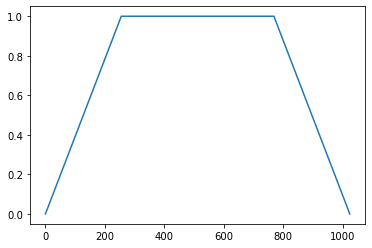

In [13]:
win = window_easing(1024, 256)
plt.plot(win)

In [58]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\"
path = "textures\\ABS\\"

directories = os.listdir(path)

print(directories)
directories = [file for file in directories if os.path.isdir(os.path.join(path,file))]
print(directories)

sample_names = directories


# for path_name in [os.path.join(path, sample) for sample in sample_names]:

for sample in sample_names:
    path_name = os.path.join(path, sample) 
    print(sample, path_name)
    
    # listing all profile names inside
    files = os.listdir(path_name)
    
    
    # select the proper extension
    files = [file for file in files if ".ua2" in file]
    print(files)
    
    
    fig, ax = plt.subplots(1,2, figsize=(15,4))

    for file in files:
        filename = os.path.join(path_name, file)
#         print(filename)
        
        # load the resolution:
        with open(filename, "r") as f:
            line = f.readline()
            if "Profil" not in line:
                break
            else:
                line = f.readline()
                
                # Read the x-length and x-resolution
                # example line: X-Maß = 17.50 X-Auflösung = 1000.00 Punkte/Zeile: 17501
                data = re.findall(r"[-+]?\d*\.\d+|\d+", line)
#                 print(line)
                x_length, x_resolution, x_total = [float(value) for value in data]
                print(file, x_length, x_resolution, x_total)
        
        # Load all the profile data and construct the x and y topography
        profile = np.loadtxt(filename, skiprows=2)
        
        assert profile.size == x_total, "Confirm that the profile size is the same as the extracted x_total in the .ua2 header"
        x = np.linspace(0,x_length, profile.size)
        
        # Detrend the profile lienarly
        profile = signal.detrend(profile, type='linear')

        spectrum_profile = np.fft.fft(profile-np.mean(profile))

        spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

        spectrum_texture = spectrum_profile
        spectrum_profile = np.abs(spectrum_profile)

        spectrum_profile = np.fft.fftshift(spectrum_profile)
        spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


        posfilename = os.path.splitext(file)[0]

        plt.sca(ax[0])

        plt.plot(x, profile, label=sample)
        plt.xlabel("x [mm]")
        plt.ylabel("Texture morphology [a.u.]")

        plt.legend()
        plt.sca(ax[1])

#         plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
        plt.plot(spectrum_spatial_freq, spectrum_profile, label=sample)
        plt.legend()

        plt.xlabel("k [1/mm]")
        plt.ylabel("Spectrum amplitude")
        plt.xlim(0,10)
        
      
        
        
        
        print("done", output_filename)
    outputname = "%s_spectrum.png"%(sample)
    output_filename = os.path.join(path_name, outputname)
    plt.savefig(output_filename)
    plt.close()
    break

['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
MT-11020 textures\ABS\MT-11020
['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
Pos01.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos02.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos03.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos04.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos05.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos06.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png


In [56]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\"
path = "textures\\ABS\\"

directories = os.listdir(path)

print(directories)
directories = [file for file in directories if os.path.isdir(os.path.join(path,file))]
print(directories)

sample_names = directories


# for path_name in [os.path.join(path, sample) for sample in sample_names]:

for sample in sample_names:
    path_name = os.path.join(path, sample) 
    print(sample, path_name)
    
    # listing all profile names inside
    files = os.listdir(path_name)
    
    
    # select the proper extension
    files = [file for file in files if ".ua2" in file]
    print(files)
    
    for file in files:
        filename = os.path.join(path_name, file)
#         print(filename)
        
        # load the resolution:
        with open(filename, "r") as f:
            line = f.readline()
            if "Profil" not in line:
                break
            else:
                line = f.readline()
                
                # Read the x-length and x-resolution
                # example line: X-Maß = 17.50 X-Auflösung = 1000.00 Punkte/Zeile: 17501
                data = re.findall(r"[-+]?\d*\.\d+|\d+", line)
#                 print(line)
                x_length, x_resolution, x_total = [float(value) for value in data]
                print(file, x_length, x_resolution, x_total)
        
        # Load all the profile data and construct the x and y topography
        profile = np.loadtxt(filename, skiprows=2)
        
        assert profile.size == x_total, "Confirm that the profile size is the same as the extracted x_total in the .ua2 header"
        x = np.linspace(0,x_length, profile.size)
        
        # Detrend the profile lienarly
        profile = signal.detrend(profile, type='linear')

        spectrum_profile = np.fft.fft(profile-np.mean(profile))

        spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

        spectrum_texture = spectrum_profile
#         spectrum_profile = np.abs(spectrum_profile)

        spectrum_profile = np.fft.fftshift(spectrum_profile)
        spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


        fig, ax = plt.subplots(1,2, figsize=(15,4))

        plt.sca(ax[0])

        plt.plot(x, profile, label=sample)
        plt.xlabel("x [mm]")
        plt.ylabel("Texture morphology [a.u.]")

        plt.legend()
        plt.sca(ax[1])

#         plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
        plt.plot(spectrum_spatial_freq, spectrum_profile, label=sample)
        plt.legend()

        plt.xlabel("k [1/mm]")
        plt.ylabel("Spectrum amplitude")
        plt.xlim(0,10)
        
        posfilename = os.path.splitext(file)[0]
        outputname = "%s_%s_spectrum.png"%(sample,posfilename)
        output_filename = os.path.join(path_name, outputname)
        plt.savefig(output_filename)
        
        plt.close()
        
        print("done", output_filename)
    break

['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
MT-11020 textures\ABS\MT-11020
['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
Pos01.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos01_spectrum.png
Pos02.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos02_spectrum.png
Pos03.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos03_spectrum.png
Pos04.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos04_spectrum.png
Pos05.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos05_spectrum.png
Pos06.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos06_spectrum.png


['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
loading file C:\Users\diogo\INL\ProTouch - Documents\Design\TactileSamples\Samples_PlateA\Day4\ABS\MT-11020\Pos02.ua2


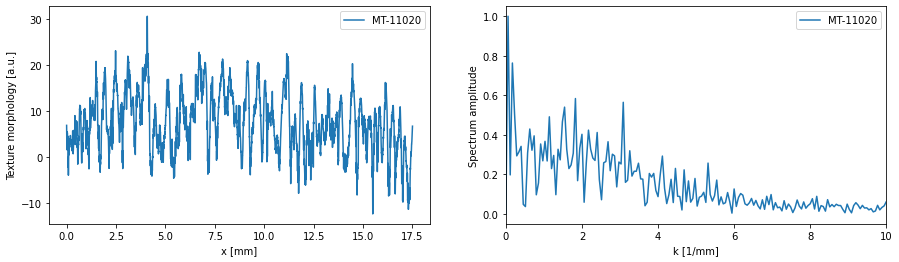

In [14]:
files = [f for f in files if '.ua2' in f]
# files = [f for f in files if 'Profil' in f]
print(files)

file = files[1]

filename = os.path.join(path, file)

print("loading file",filename)

line_length = 17.5 #mm
data = np.loadtxt(filename, skiprows=2)

profile = data
x = np.linspace(0,line_length, profile.size)

spectrum_profile = np.fft.fft(profile-np.mean(profile))

spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

spectrum_texture = spectrum_profile
spectrum_profile = np.abs(spectrum_profile)

spectrum_profile = np.fft.fftshift(spectrum_profile)
spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.sca(ax[0])

plt.plot(x, profile, label=sample)
plt.xlabel("x [mm]")
plt.ylabel("Texture morphology [a.u.]")

plt.legend()
plt.sca(ax[1])

plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
plt.legend()

plt.xlabel("k [1/mm]")
plt.ylabel("Spectrum amplitude")
plt.xlim(0,10)
plt.savefig("%s_spectrum.png"%(sample))

['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
loading file C:\Users\diogo\INL\ProTouch - Documents\Design\TactileSamples\Samples_PlateA\Day4\ABS\MT-11020\Pos02.ua2


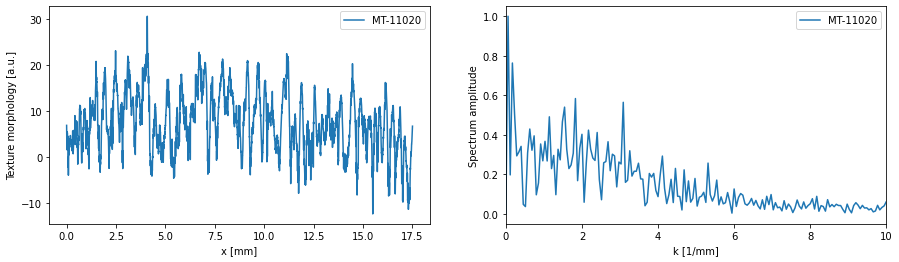

In [14]:





import os


path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)

files = os.listdir(path)

files = [f for f in files if '.ua2' in f]
# files = [f for f in files if 'Profil' in f]
print(files)

file = files[1]

filename = os.path.join(path, file)

print("loading file",filename)

line_length = 17.5 #mm
data = np.loadtxt(filename, skiprows=2)

profile = data
x = np.linspace(0,line_length, profile.size)

spectrum_profile = np.fft.fft(profile-np.mean(profile))

spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

spectrum_texture = spectrum_profile
spectrum_profile = np.abs(spectrum_profile)

spectrum_profile = np.fft.fftshift(spectrum_profile)
spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.sca(ax[0])

plt.plot(x, profile, label=sample)
plt.xlabel("x [mm]")
plt.ylabel("Texture morphology [a.u.]")

plt.legend()
plt.sca(ax[1])

plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
plt.legend()

plt.xlabel("k [1/mm]")
plt.ylabel("Spectrum amplitude")
plt.xlim(0,10)
plt.savefig("%s_spectrum.png"%(sample))
